## 练习1

尝试做这么一个模型，一个小球，在地面以速度v向上抛，每次落到地面回会弹起，速度变为原来的0.9，
请算出他弹跳10次的图像，横轴为时间，纵轴为y位移。

提示：需要求2阶导数，知道怎么搞吧，每次落地就停止计算，然后重新计算初值，然后重新开始，
是一个新的处置问题，不是一个方正就能算完的，用循环算10次。，同时记录每次弹起最高点的位置。

因为有二阶导数，所以y和y'都是需要求解的对象：
$$
\begin{cases}
y'=y'\\
y''=-9.8\\
\end{cases}
$$

In [1]:

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# the ode
def dydt(t, y):
    return np.array([y[1], -9.8])

# hit the ground
def hitEvent(t, y):
    return y[0]

hitEvent.terminal = True
hitEvent.direction = -1

# hit the top
def topEvent(t,y):
    return y[1]
topEvent.direction = -1


0
4.081632653061225
7.551020408163265
10.612244897959183
13.26530612244898
15.510204081632654
17.346938775510207
18.9795918367347
20.40816326530613
21.632653061224495


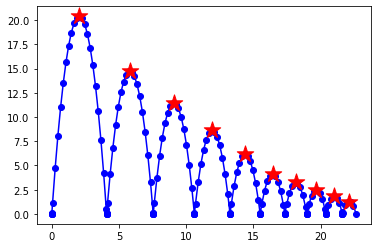

In [19]:

t0 = 0
tf = 30
v0=20
y0 = np.array([0, v0])
# this well receive the outpot
tOut = np.array([t0])
yOut = y0.reshape(2,1)
# this receives y top and time 
yTop=np.zeros([10,2])

# bounce 10 times
for i in range(10):
    sol = solve_ivp(dydt, [t0, tf], y0, events=[hitEvent,topEvent], max_step=0.2)
    # the time should be starting from the end of last round
    lastEndTime=tOut[-1]
    # concatenate the result to the previous results
    tOut = np.hstack((tOut, sol.t+lastEndTime))
    yOut = np.hstack((yOut, sol.y))
    # mark the top y, note the y is (y,y'), so take only the first
    # and the event only happend once, it is the second event in events as hitEvent is the first one
    yTop[i,0]=sol.y_events[1][0,0]
    # mark the time it reached top y
    yTop[i,1]=sol.t_events[1][0]+lastEndTime
    
    #start all over with speed reduced
    y0[0] = 0
    y0[1] = -0.9 * sol.y[1][-1]
    print(lastEndTime)

plt.scatter(yTop[:,1], yTop[:,0], c='r', marker='*',s=300,zorder=5)
plt.plot(tOut, yOut[0], c='b', marker='o')


In [16]:
yTop

array([[20.40816327,  2.04081633],
       [14.74489796,  5.81632653],
       [11.47959184,  9.08163265],
       [ 8.62244898, 11.93877551],
       [ 6.17346939, 14.3877551 ],
       [ 4.13265306, 16.42857143],
       [ 3.26530612, 18.16326531],
       [ 2.5       , 19.69387755],
       [ 1.83673469, 21.02040816],
       [ 1.2755102 , 22.14285714]])

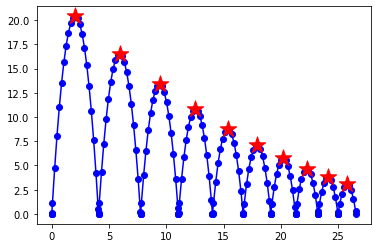

In [32]:
t0 = 0
tf = 30
v0 = 20
y0 = [0,v0]
tout = np.array([t0])
yout = np.array(y0).reshape(2,1)
top = np.zeros([10,2])

for i in range(10):
    sol = solve_ivp(dydt,[t0,tf], y0, events=[hitEvent,topEvent], max_step=0.2)
    lastTime = tout[-1]
    tout = np.hstack((tout,sol.t+lastTime))
    yout = np.hstack((yout,sol.y))
    top[i,0] = sol.t_events[1][-1]+lastTime
    top[i,1] = sol.y_events[1][0,0]
    y0[0] = 0
    y0[1] = sol.y[1][-1]*-0.9

plt.scatter(top[:,0], top[:,1], c='r', marker='*',s=300,zorder=10)
plt.plot(tout,yout[0],c='b',marker='o')